# Análise Exploratória de Dados
* **Autor:** Lavínia Caldas


* **Objetivo:** Definir um conjunto de dados a fim de analisar a sua consistência e estudar de forma estatística as informações presentes.

* **Dataset:** Irís ([Link](https://archive.ics.uci.edu/dataset/53/iris))
* **Descrição:** Um conjunto de dados para classificação entre 3 tipos de plantas.
* **Classes:** 
    * Iris Setosa
    * Iris Versicolor
    * Iris Virgínica.
* **Atributos:** 
    * Comprimento da sépala
    * Largura da sépala
    * Comprimento da pétala
    * Largura da pétala.

* **Sumário:**

    1. Obtenção dos Dados
        1. Importação das Bibliotecas
        2. Leitura dos Atributos
    2. Análise Exploratória dos Dados
        1. Métrica de Posição
        2. Métrica de Dispersão
        3. Associação entre Variáveis
    3. Conclusões 
        1. Trabalhos Futuros


## 1. Obtenção dos Dados

###  1.1. Importação das Bibliotecas

In [1]:
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

### 1.2. Leitura dos Atributos

In [5]:
data = pd.read_csv("iris.data", header=None)

data.head(5)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
pd.Series.mean(data[0]), pd.Series.mean(data[1]), pd.Series.mean(data[2]), pd.Series.mean(data[3])

(5.843333333333334, 3.0540000000000003, 3.758666666666666, 1.1986666666666668)

In [31]:
pd.Series.mean(data[0][data[4] == 'Iris-setosa']), pd.Series.mean(data[0][data[4] == 'Iris-versicolor']), pd.Series.mean(data[0][data[4] == 'Iris-virginica'])

(5.006, 5.936, 6.587999999999998)

## 2. Análise Exploratória dos Dados

### 2.1. Métrica de Posição

### 2.2. Métrica de Dispersão

### 2.3. Associação entre Variáveis

## 3. Conclusões

### 3.1 Trabalhos Futuros

<AxesSubplot:xlabel='0', ylabel='Count'>

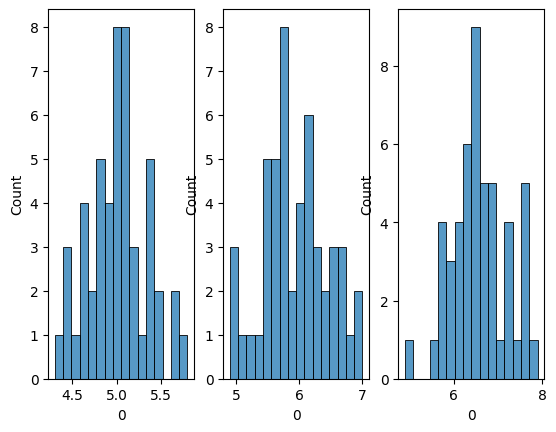

In [15]:
plt.subplot(131)
sn.histplot(data[0][data[4] == 'Iris-setosa'], bins=16)

plt.subplot(132)
sn.histplot(data[0][data[4] == 'Iris-versicolor'], bins=16)

plt.subplot(133)
sn.histplot(data[0][data[4] == 'Iris-virginica'], bins=16)



<AxesSubplot:xlabel='1', ylabel='Count'>

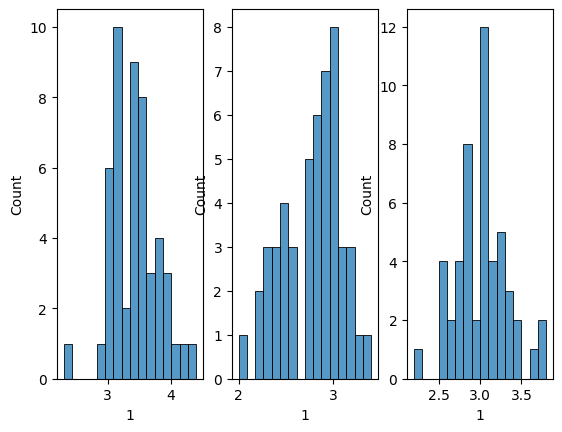

In [16]:
plt.subplot(131)
sn.histplot(data[1][data[4] == 'Iris-setosa'], bins=16)

plt.subplot(132)
sn.histplot(data[1][data[4] == 'Iris-versicolor'], bins=16)

plt.subplot(133)
sn.histplot(data[1][data[4] == 'Iris-virginica'], bins=16)



<AxesSubplot:xlabel='2', ylabel='Count'>

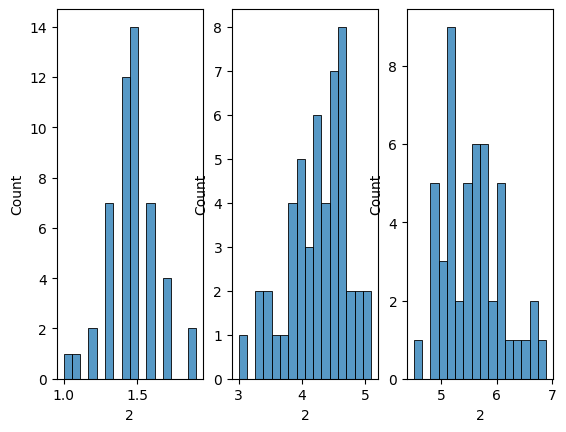

In [17]:
plt.subplot(131)
sn.histplot(data[2][data[4] == 'Iris-setosa'], bins=16)

plt.subplot(132)
sn.histplot(data[2][data[4] == 'Iris-versicolor'], bins=16)

plt.subplot(133)
sn.histplot(data[2][data[4] == 'Iris-virginica'], bins=16)



<AxesSubplot:xlabel='3', ylabel='Count'>

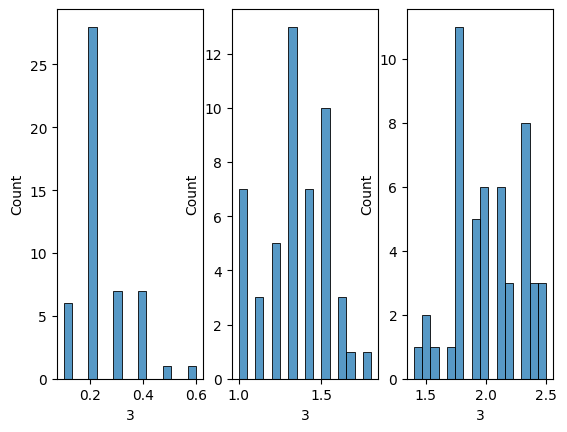

In [18]:
plt.subplot(131)
sn.histplot(data[3][data[4] == 'Iris-setosa'], bins=16)

plt.subplot(132)
sn.histplot(data[3][data[4] == 'Iris-versicolor'], bins=16)

plt.subplot(133)
sn.histplot(data[3][data[4] == 'Iris-virginica'], bins=16)



In [ ]:
pd.Series.mean(data[0][data[4] == 'Iris-versicolor']), pd.Series.mean(data[0][data[4] == 'Iris-virginica'])